           시점         아시아   한국    이스라엘     일본   터키        북아메리카   캐나다  멕시코  \
0  1959-01-01    0.000000    0     0.0    0.0    0     0.000000     0    0   
1  1960-01-01  764.000000   79  1229.0  475.0  509  1870.333333  2259  345   
2  1961-01-01  791.000000   84  1436.0  569.0  284  1890.000000  2240  363   
3  1962-01-01  711.333333   90  1095.0  640.0  309  1963.666667  2269  378   
4  1963-01-01  812.333333  103  1258.0  725.0  351  2052.666667  2374  409   

     미국  ...  슬로바키아  슬로베니아  스페인   스웨덴     스위스    영국   오세아니아  오스트레일리아    뉴질랜드  \
0     0  ...    0.0    0.0    0     0     0.0     0     0.0        0     0.0   
1  3007  ...    NaN    NaN  396  2114  1787.0  1398  2060.5     1808  2313.0   
2  3067  ...    NaN    NaN  450  2289  1971.0  1472  2109.0     1875  2343.0   
3  3244  ...    NaN    NaN  520  2469  2131.0  1526  2150.5     1852  2449.0   
4  3375  ...    NaN    NaN  609  2657  2294.0  1613  2293.0     1964  2622.0   

            세계  
0     0.000000  
1  1155.181481  

<AxesSubplot:>

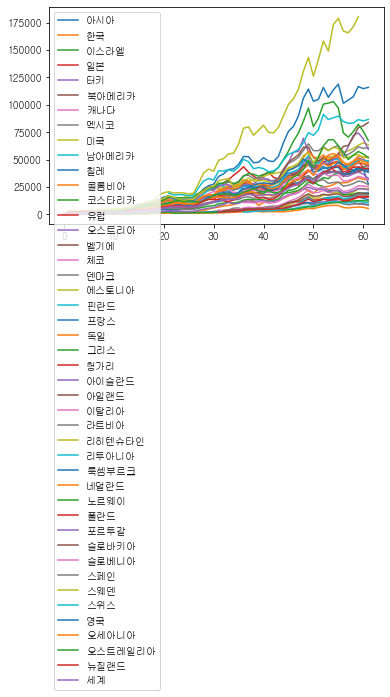

In [7]:
import pandas as pd
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
df =pd.read_csv('d:/data/project/project_keras_GDP.csv',encoding='CP949')
print(df.head())
df.plot()


In [8]:
df = df.fillna(method='ffill')

In [9]:
df['시점'] = pd.to_datetime(df['시점'])
df = df.set_index('시점')
print(df.head())

                   아시아   한국    이스라엘     일본   터키        북아메리카   캐나다  멕시코    미국  \
시점                                                                              
1959-01-01    0.000000    0     0.0    0.0    0     0.000000     0    0     0   
1960-01-01  764.000000   79  1229.0  475.0  509  1870.333333  2259  345  3007   
1961-01-01  791.000000   84  1436.0  569.0  284  1890.000000  2240  363  3067   
1962-01-01  711.333333   90  1095.0  640.0  309  1963.666667  2269  378  3244   
1963-01-01  812.333333  103  1258.0  725.0  351  2052.666667  2374  409  3375   

                 남아메리카  ...  슬로바키아  슬로베니아  스페인   스웨덴     스위스    영국   오세아니아  \
시점                      ...                                                  
1959-01-01    0.000000  ...    0.0    0.0    0     0     0.0     0     0.0   
1960-01-01  379.000000  ...    0.0    0.0  396  2114  1787.0  1398  2060.5   
1961-01-01  394.666667  ...    0.0    0.0  450  2289  1971.0  1472  2109.0   
1962-01-01  421.000000  ...    0.0    0.0 

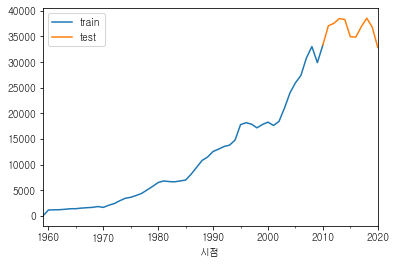

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
split_date = pd.Timestamp('01-01-2010')
train = df.loc[:split_date, ['세계']]
test = df.loc[split_date:,['세계']]
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train','test'])

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(train)
train_sc = sc.transform(train)
test_sc = sc.transform(test)
train_sc[:5]

array([[0.        ],
       [0.03468597],
       [0.03564559],
       [0.03634588],
       [0.03877813]])

In [12]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index = train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index = test.index)
train_sc_df.head()

,Scaled
시점,
1959-01-01,0.000000
1960-01-01,0.034686
1961-01-01,0.035646
1962-01-01,0.036346
1963-01-01,0.038778


In [13]:
for s in range(1,2):
    train_sc_df[f'shift_{s}'] = train_sc_df['Scaled'].shift(s)
    test_sc_df[f'shift_{s}'] = test_sc_df['Scaled'].shift(s)
    
train_sc_df.head(5)

,Scaled,shift_1
시점,,
1959-01-01,0.000000,NaN
1960-01-01,0.034686,0.000000
1961-01-01,0.035646,0.034686
1962-01-01,0.036346,0.035646
1963-01-01,0.038778,0.036346


In [14]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]
X_test = test_sc_df.dropna().drop('Scaled',axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [15]:
X_train = X_train.values
X_test= X_test.values
y_train = y_train.values
y_test = y_test.values

In [16]:
X_train_t = X_train.reshape(X_train.shape[0], 1, 1)
X_test_t = X_test.reshape(X_test.shape[0], 1, 1)
print("최종 DATA") 
print(X_train_t.shape)

최종 DATA
(51, 1, 1)


In [17]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(LSTM(20, input_shape=(1, 1))) 
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 20)                1760      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [18]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=2)
hist = model.fit(X_train_t,y_train,epochs=1000,validation_split=0.2,verbose=0,batch_size=20 ,callbacks=[early_stopping])
# model.fit(X_train_t, y_train, epochs=1000,validation_split=0.2, batch_size=30,verbose=0)


In [19]:
score=model.evaluate(X_test_t, y_test, verbose=0)
print(score) 
y_pred = model.predict(X_test_t)
print(y_pred.flatten()[:10])
print(y_test.flatten()[:10])

0.012328358367085457
1/1 [==============================] - 1s 622ms/step
[1.0690868 1.1963947 1.2128637 1.2443621 1.2381648 1.1240704 1.1219792
 1.1903168 1.2466658 1.1869515]
[1.11229472 1.12682317 1.15462008 1.14914982 1.04850981 1.04666552
 1.10693367 1.15665365 1.10396561 0.98586612]


In [20]:
import numpy as np
np.mean(y_test.flatten() - y_pred.flatten())

-0.08393736779422618

-0.08393736779422618


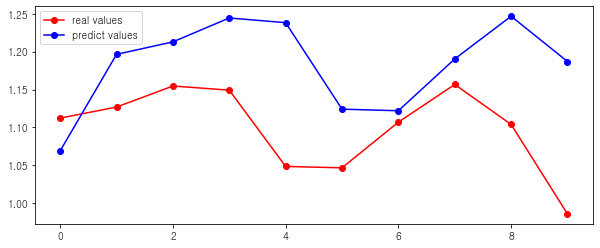

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
print(np.mean(y_test.flatten() - y_pred.flatten()))
fig = plt.figure(figsize=(10, 4))
plt.plot(y_test.flatten(), 'ro-', label='real values')
plt.plot(y_pred.flatten(), 'bo-', label='predict values')
plt.legend()
plt.show()

1/1 [==============================] - 0s 21ms/step


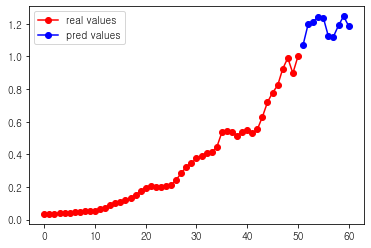

In [22]:
pred = model.predict(X_test_t)
a = np.concatenate((y_train.flatten(), np.zeros(len(y_test))+np.nan))
b = np.concatenate((np.zeros(len(y_train))+np.nan, pred.flatten()))
plt.plot(a,'ro-',label='real values')
plt.plot(b,'bo-',label='pred values')
plt.legend()
plt.show()